## Logistic Regression

### Binary Classification

In [29]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

Dataset Download link: [Social Netword](https://drive.google.com/file/d/1Z-pDFojE5G4bUWQdq7FNrz-_l90-mI6d/view?usp=drive_link)

In [30]:
# loading the data

df = pd.read_csv('../datasets/Social_Network_Ads.csv')

In [31]:
df.shape

(400, 5)

In [32]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


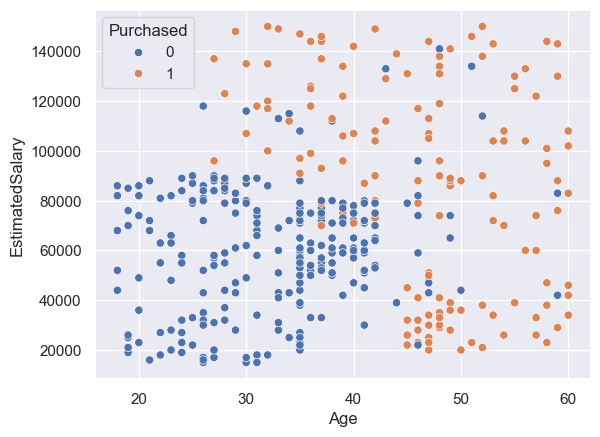

In [33]:
# observing the data

sns.set_theme(style='darkgrid')
sns.scatterplot(df, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

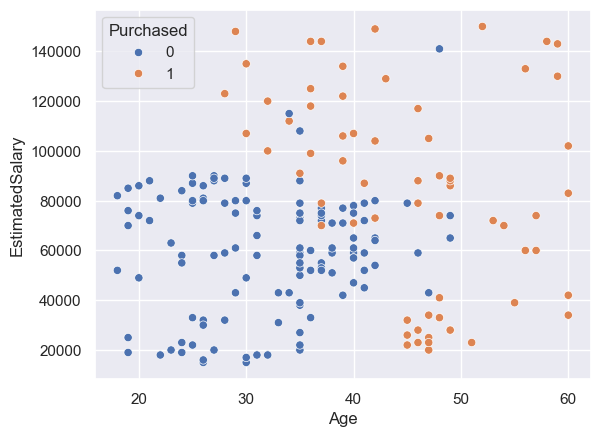

In [34]:
# observing the male data

male = df[df['Gender'] == 'Male']
sns.set_theme(style='darkgrid')
sns.scatterplot(male, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

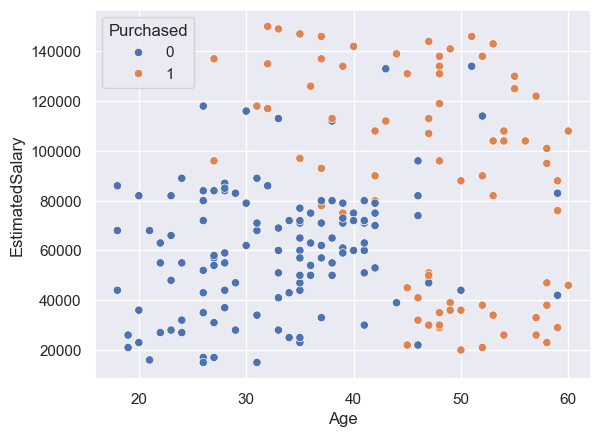

In [35]:
# observing the female data

female = df[df['Gender'] == 'Female']
sns.set_theme(style='darkgrid')
sns.scatterplot(female, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

In [36]:
# As data is not totally linearly seperable, logistic regression doesn't give satisfied results

gender = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender], axis=1)
X = df.drop(['Female', 'Purchased', 'User ID', 'Gender'], axis=1).values
y = df['Purchased'].values

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [40]:
# training with the logistic regression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_scaled, y)

LogisticRegression()

In [45]:
# getting the weights of the model

print(f"Weights shape: {log_reg_model.coef_.shape}")
print(f"Model weights: {log_reg_model.coef_}")
print(f"Model intercepts: {log_reg_model.intercept_}")
print(f"classes: {log_reg_model.classes_}")

Weights shape: (1, 3)
Model weights: [[2.29122065 1.14717672 0.14556209]]
Model intercepts: [-1.09865243]
classes: [0 1]


In [89]:
plane = log_reg_model.coef_[0,0]*X_scaled[:, 0] + log_reg_model.coef_[0,1]*X_scaled[:, 1] + log_reg_model.coef_[0,2]*X_scaled[:, 2] + log_reg_model.intercept_

In [92]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [94]:
new_frame = pd.DataFrame({
    'plane': plane,
    'sigmoid_val': sigmoid(plane),
    'output': y
})


In [96]:
new_frame = new_frame.sort_values('plane')

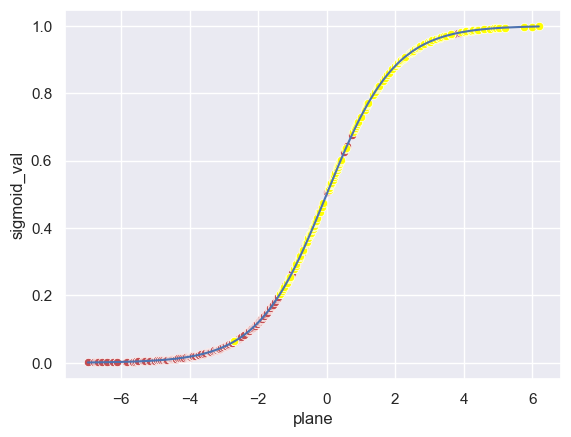

In [105]:
# sigmoid plane

c1 = new_frame[new_frame['output'] == 0]
c2 = new_frame[new_frame['output'] == 1]

sns.lineplot(new_frame, x='plane', y='sigmoid_val')
sns.scatterplot(c1,x='plane', y='sigmoid_val', color = 'r')
sns.scatterplot(c2, x='plane', y='sigmoid_val', color = 'yellow')
plt.show()

sample Prediction

In [55]:
data = [[19, 19000, 1]]
data_scaled = sc.transform(data)

In [56]:
data_scaled

array([[-1.78179743, -1.49004624,  1.02020406]])

In [57]:
log_reg_model.predict(data_scaled)

array([0])

Metrics values

In [88]:
# accruracy

y_pred = log_reg_model.predict(X_scaled)

print(f"Accuracy: {accuracy_score(y_pred, y)}")
print(f"Recall (on 1): {recall_score(y_pred=y_pred, y_true=y):.4f}")
print(f"Precesion (on 1): {precision_score(y_pred=y_pred, y_true=y):.4f}")
print(f"F1 socre (on 1): {f1_score(y_pred=y_pred, y_true=y):.4f}")

Accuracy: 0.8525
Recall (on 1): 0.7273
Precesion (on 1): 0.8387
F1 socre (on 1): 0.7790


In [87]:
# classification report

print(f"Overall classification report is \n: {classification_report(y_pred=y_pred, y_true=y)}")

Overall classification report is 
:               precision    recall  f1-score   support

           0       0.86      0.92      0.89       257
           1       0.84      0.73      0.78       143

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



### Multiclass Classification

In [ ]:
# loading digits data, from the sklearn datasets

from sklearn.datasets import load_digits

In [110]:
digits = load_digits()

In [111]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [116]:
input_data = digits.data
target = digits.target

In [118]:
# shape of the data
print(input_data.shape)
print(target.shape)

(1797, 64)
(1797,)


0


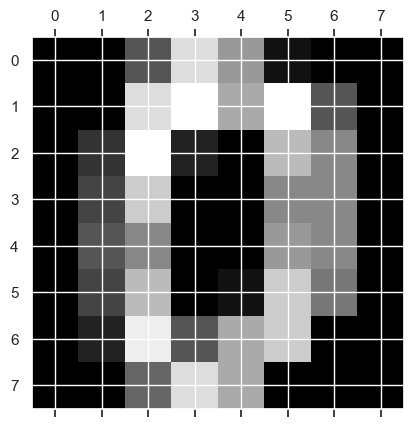

In [122]:
# visualizing one row

plt.matshow(input_data[0].reshape(8,8), cmap = 'gray')
print(target[0])

4


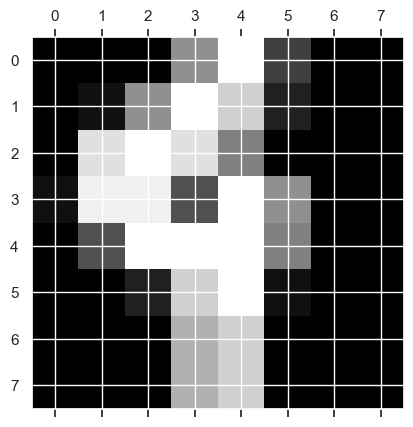

In [123]:
plt.matshow(input_data[87].reshape(8,8), cmap = 'gray')
print(target[87])

In [136]:
# scaling the data

digits.data = digits.data/16

In [137]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [138]:
print("train shape:", x_train.shape)
print("test shape:", x_test.shape)

train shape: (1437, 64)
test shape: (360, 64)


In [140]:
# training the model

mul_log_reg = LogisticRegression()
mul_log_reg.fit(x_train, y_train)

LogisticRegression()

In [143]:
# predicting some values

print("original:", y_test[4])
print(f"Predicted: {mul_log_reg.predict(x_test[4].reshape(1, -1))[0]}")

original: 2
Predicted: 2


In [ ]:
print("original:", y_test[77])
print(f"Predicted: {mul_log_reg.predict(x_test[77].reshape(1, -1))[0]}")

original: 5
Predicted: 5


In [145]:
print("original:", y_test[23])
print(f"Predicted: {mul_log_reg.predict(x_test[23].reshape(1, -1))[0]}")

original: 7
Predicted: 7


In [146]:
# report

print(f"classificaition report is:\n{classification_report(y_true=y_test, y_pred=mul_log_reg.predict(x_test))}")

classificaition report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.91      0.91      0.91        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.95      0.93        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [148]:
# observing the model weights

print(f"shape of the weights: {mul_log_reg.coef_.shape}\n")
print(f"The weights are\n{mul_log_reg.coef_}\n")
print(f"Intercepts:\n{mul_log_reg.intercept_}\n")
print(f"Classes of model:\n{mul_log_reg.classes_}")

shape of the weights: (10, 64)

The weights are
[[ 0.00000000e+00 -4.53793515e-02 -7.50776738e-02  3.65937781e-01
  -6.92072719e-02 -6.93797542e-01 -4.34729399e-01 -6.33149589e-02
  -4.14871117e-04 -2.28038787e-01  9.37840554e-02  4.87690698e-01
   3.11438096e-01  4.59391041e-01 -3.00007125e-01 -5.91579974e-02
  -7.79880627e-03  1.46471186e-01  5.99227300e-01 -1.58627750e-01
  -1.25733566e+00  9.31168227e-01  1.44965504e-01 -1.73263924e-02
  -3.87921998e-03  5.43049468e-01  6.29796281e-01 -9.31135537e-01
  -2.07209760e+00  2.44058285e-01  5.88707121e-01 -2.55411593e-03
   0.00000000e+00  6.83146168e-01  6.58083540e-01 -1.09517993e+00
  -1.82772404e+00 -1.18676347e-01  6.02416538e-01  0.00000000e+00
  -5.38534880e-03  9.25695654e-02  1.29386230e+00 -8.21501533e-01
  -8.96241682e-01  2.73316805e-01  2.84239095e-01 -1.78210407e-03
  -1.93171467e-02 -2.94925278e-01  7.18114815e-01 -1.43371790e-01
   4.82361459e-01  3.48838882e-01 -3.47273942e-01 -4.11963433e-02
  -1.04366643e-04 -5.0803114

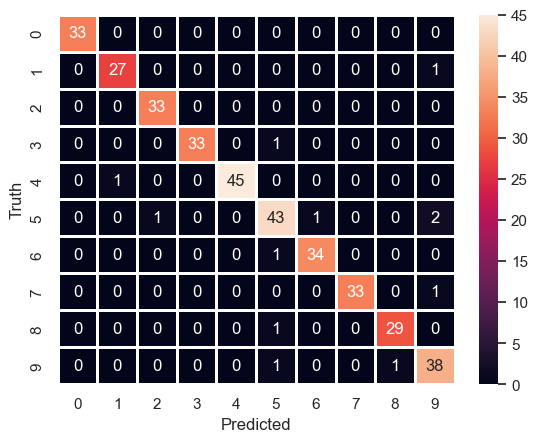

In [151]:
# confution matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predictions = mul_log_reg.predict(x_test)

cm = confusion_matrix(y_test, y_predictions)

sns.heatmap(cm, annot=True, linewidths=1)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
